## Content of the current notebook:
* Selection of data with Pandas
https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.02-Data-Indexing-and-Selection.ipynb
* Using map and apply

# Selection of data with Pandas

## Selecting a column
`sr_of_column = df[<column_name>]`

The result is a pandas Series.

## Selecting multiple columns
`df_with_selected_columns = df[[<column_name1>,<column_name2>]]`

## Selecting some rows by boolean series
`df_selection = df[<boolean_series>]`

You can select rows from a dataframe, with a series of dtype boolean. Only those columns are selected, where the value of the Series is "true". The result is the selected dataframe.

## Selecting rows and columns
`df_selection = df.loc[<boolean_series>, [<column_name1>,<column_name2>]]`

or

`df_selection = df[<boolean_series>][[<column_name1>,<column_name2>]]`

## Selecting rows by index
`df_selection = df.loc[<index_name>]`

## Selecting rows by position
`df_selection = df.iloc[<position_idx>]`

In [0]:
import pandas as pd

### Load the data from ReDI - Resellers Analysis

In [0]:
# Link to the online location
url = 'https://raw.githubusercontent.com/ReDI-School/python-data-science/master/datasets/reseller/orders.csv'

In [0]:
# Load the data as a Pandas Data Frame and see the content
data = pd.read_csv(url, parse_dates=['datetime_ordered'])

In [10]:
data.loc[:, "product_id"]

0     9493
1     3771
2     6902
3     8141
4     7787
5     5425
6     5425
7     1425
8      933
9     6902
10    3771
11     933
12    7060
13      37
14    2920
15    3771
16      37
17    5860
18    9493
19    6272
20    2577
21    5190
22    4187
23    2577
24    9493
25    5387
26    5165
27      37
28     492
29     933
      ... 
70     492
71    5860
72    7060
73    8088
74    3484
75    6198
76    1228
77    5425
78    8718
79    2958
80    5387
81    1254
82    7761
83    1254
84    2958
85    6198
86    5860
87    5190
88    7060
89      37
90    2920
91    2419
92    4187
93    2419
94    6272
95    3771
96     774
97    6198
98    5340
99    3617
Name: product_id, Length: 100, dtype: int64

In [13]:
data.head()

,order_id,product_id,purchase_price,sales_price,customer_id,used_promo_code,datetime_ordered
0,177,9493,89.0,119.99,325,True,2018-06-27 17:20:50
1,255,3771,31.0,49.99,436,False,2018-06-17 04:54:24
2,893,6902,3.5,4.49,532,True,2018-07-22 21:05:31
3,571,8141,6.0,13.99,86,False,2018-07-10 16:55:21
4,376,7787,5.4,13.99,125,True,2018-07-28 06:11:38


In [24]:
data.query("purchase_price > 10 and sales_price > 100")

,order_id,product_id,purchase_price,sales_price,customer_id,used_promo_code,datetime_ordered
0,177,9493,89.0,119.99,325,True,2018-06-27 17:20:50
14,477,2920,82.0,109.99,423,False,2018-06-08 13:12:43
18,697,9493,89.0,119.99,563,False,2018-07-21 05:13:07
24,226,9493,89.0,119.99,743,False,2018-06-08 04:17:16
53,909,2920,82.0,109.99,1906,False,2018-06-20 16:06:28
57,680,9493,89.0,119.99,2034,False,2018-07-05 06:33:43
90,580,2920,82.0,109.99,3860,False,2018-06-25 08:36:44


In [0]:
import pandas as pd

#### How much sales were generated from orders with promo code?

In [0]:
# Exercise 1: Why might the CEO be interested in knowing how much sales where generated by a promo code?

In [8]:
# Exercise 2: Calculate the amoung.
data.loc[data.used_promo_code, 'sales_price'].sum()

660.29

In [9]:
# Exercise 2b: How much without promo code?
data.loc[~data.used_promo_code, 'sales_price'].sum()

3115.239999999999

### A adhoc request

---

Dear BI Team,

I just heared from the Finance Team, that the customer, with the id
2708, 86, 1005, 1661 are most likely fraudster and did not payed 
their bills. Can you check quickly how much money we lost?

Thanks!

---

In [10]:
# Exercise 3: Answer the request. (Tips: Have look at pd.Series.isin())
data.loc[data.customer_id.isin([2708, 86, 1005, 1661]), 'purchase_price'].sum()

84.0

#### Calcuate the total sales after the 5th of July


In [11]:
# Exercise 4: Calculate the total sales after the given date.
data.loc[(data.datetime_ordered > '2018-07-05'), 'sales_price'].sum()

1571.12

#### Calcuate the total sales of two periods, which is higher?

1.   First period: from 2018-06-14 to 2018-06-27
2.   Second period: from 2018-07-14 to 2018-07-27

Use the "and" operator. 


In [12]:
# Exercise 5: Calculate the total sales for the first period.
data.loc[(data.datetime_ordered <= '2018-06-27') & (data.datetime_ordered >= '2018-06-14'), 'sales_price'].sum()

1      49.99
9       4.49
10     49.99
15     49.99
20     28.99
44     37.99
46     37.99
53    109.99
55      8.99
56     49.99
59      8.99
67     39.99
70     29.99
74     24.99
78      8.99
79     14.99
80     11.99
90    109.99
91     20.99
92      8.99
93     20.99
99      8.99
Name: sales_price, dtype: float64

In [13]:
# Exercise 6: Calculate the total sales for the second period.
data.loc[(data.datetime_ordered <= '2018-07-27') & (data.datetime_ordered >= '2018-07-14'), 'sales_price'].sum()

833.29

### Advanced Questions

In [14]:
# Answer Exercise 3 by creating and using an index on the customer_id column
data.set_index('customer_id').loc[[2708, 86, 1005, 1661], 'purchase_price'].sum()

84.0

# Map and appy

Map and apply are working very similar, we will focus on the three most common use cases of both.

### Creating a new series from a other on by matching a dict


In [15]:
d = {1: 'Bob', 2: 'Anna'}
sr = pd.Series([1, 2, 2, 1, 3])
sr

0    1
1    2
2    2
3    1
4    3
dtype: int64

In [16]:
sr_str = sr.map(d)
sr_str

0     Bob
1    Anna
2    Anna
3     Bob
4     NaN
dtype: object

### Creating a new series from a other on by applying a function


In [0]:
def invert_string(string):
    if not pd.isnull(string):
        return string[::-1]
    else:
        return string

In [18]:
sr_str.map(invert_string)

0     boB
1    annA
2    annA
3     boB
4     NaN
dtype: object

In [19]:
sr_str.apply(invert_string)

0     boB
1    annA
2    annA
3     boB
4     NaN
dtype: object

## And now you again

---

Dear BI Team,

We would like to have a better overview how many different articles in each product categories we are selling.

The categories are:

* clothing: T-shirts, Jackets, Trouseres
* acessoire: Bag, Hat
* foodware: shoes, socks

Thanks!

PS: This table should be helpfull:
https://raw.githubusercontent.com/ReDI-School/python-data-science/master/datasets/reseller/product_details.csv

---

In [0]:
# Exercise 7: Load the data, create a new column "category_name", visualize the "category".
url = 'https://raw.githubusercontent.com/ReDI-School/python-data-science/master/datasets/reseller/product_details.csv'
product_df = pd.read_csv(url)

In [21]:
product_df.head()

,product_id,product_name,product_brand
0,2448,T-shirt,Reebok
1,5425,Shoes,Adidas
2,1254,T-shirt,Jack Wolfskin
3,1254,T-shirt,Jack Wolfskin
4,7787,T-shirt,Adidas


In [22]:
product_df.product_name.unique()

array(['T-shirt', 'Shoes', 'Socks', 'Jacket', 'Hat', 'Trousers', 'Bag'],
      dtype=object)

In [0]:
category_mapping = {
    'T-shirt': 'clothing',
    'Shoes': 'foodware', 
    'Socks': 'foodware', 
    'Jacket': 'clothing', 
    'Hat': 'accessoire', 
    'Trousers': 'clothing',
    'Bag': 'accessoire'
}
product_df['category_name'] = product_df.product_name.map(category_mapping)


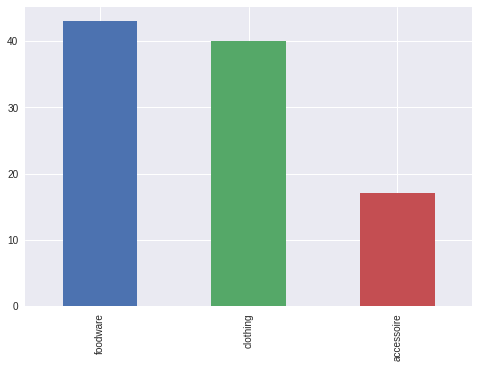

In [24]:
product_df.category_name.value_counts(dropna=False).plot(kind='bar')

### Advanced

As you know, the discount from the promo_code was not included in the sales price. A previous colleque in your team developed the method to apply a discount of 20 Euros whenever a promo code was used.

In [25]:
data.head()

,order_id,product_id,purchase_price,sales_price,customer_id,used_promo_code,datetime_ordered
0,177,9493,89.0,119.99,325,True,2018-06-27 17:20:50
1,255,3771,31.0,49.99,436,False,2018-06-17 04:54:24
2,893,6902,3.5,4.49,532,True,2018-07-22 21:05:31
3,571,8141,6.0,13.99,86,False,2018-07-10 16:55:21
4,376,7787,5.4,13.99,125,True,2018-07-28 06:11:38


In [0]:
def apply_discount(row):
    if row.used_promo_code:
        return row.sales_price - 20
    else:
        return row.sales_price

In [27]:
# Exercise 8: Create a new column "sales_price_after_discount" by applying "apply_discount" to the dataframe
data['sales_price_after_discount'] = data.apply(apply_discount, axis=1)
data.head()

,order_id,product_id,purchase_price,sales_price,customer_id,used_promo_code,datetime_ordered,sales_price_after_discount
0,177,9493,89.0,119.99,325,True,2018-06-27 17:20:50,99.99
1,255,3771,31.0,49.99,436,False,2018-06-17 04:54:24,49.99
2,893,6902,3.5,4.49,532,True,2018-07-22 21:05:31,-15.51
3,571,8141,6.0,13.99,86,False,2018-07-10 16:55:21,13.99
4,376,7787,5.4,13.99,125,True,2018-07-28 06:11:38,-6.01


### Bonus

In a revision of the data the finance department realized that there is a mistake in the logic.


1.   Promo Codes can only be applied, when the sales price is larger then 50 Euro
2.   From July on a discount of 20% was given, instead of a fixed discount of 20Euro

Fix the method accordingly.
Calculate the sum of sales with the old and with the new logic. How much is the difference?

In [0]:
from datetime import datetime

def apply_discount_corrected(row):
    if row.used_promo_code and row.sales_price > 50:
        if row.datetime_ordered >= datetime(2018, 7, 1):
            return row.sales_price * 0.8
        else:
            return row.sales_price - 20
    else: 
        return row.sales_price

In [0]:
data['sales_price_after_discount_corrected'] = data.apply(apply_discount_corrected, axis=1)

In [34]:
data[['sales_price_after_discount_corrected', 'sales_price_after_discount']].sum()

sales_price_after_discount_corrected    3709.534
sales_price_after_discount              3355.530
dtype: float64